In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv('/content/diabetes (3).csv')
data.shape

(768, 9)

In [9]:
768*70/100

537.6

In [10]:
# data sample
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
# null value check
data.isnull().mean()*100

,0
Pregnancies,0.0
Glucose,0.0
BloodPressure,0.0
SkinThickness,0.0
Insulin,0.0
BMI,0.0
DiabetesPedigreeFunction,0.0
Age,0.0
Outcome,0.0


In [12]:
# data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: >

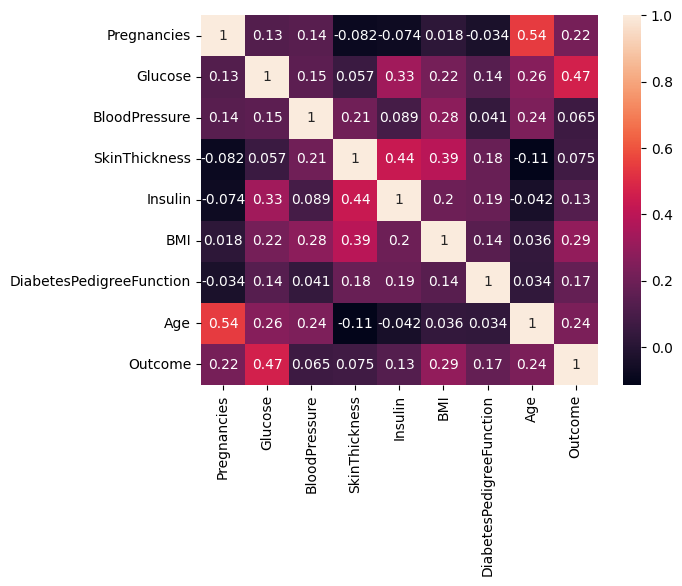

In [13]:
# correlation check
plt.figure.figsize=(10,8)
sns.heatmap(data.corr(), annot=True)

In [14]:
# split the data into x and y
x = data.drop(['Outcome'], axis=1)
y = data['Outcome']

In [15]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [16]:
# data standardization
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

In [17]:
x_train_scaled

array([[-0.8362943 , -0.80005088, -0.53576428, ..., -1.06015343,
        -0.61421636, -0.94861028],
       [ 0.39072767, -0.49054341,  0.12804365, ...,  0.64646721,
        -0.90973787, -0.43466673],
       [-1.14304979,  0.43797901, -0.09322566, ...,  1.35537117,
        -0.30699103, -0.77729576],
       ...,
       [ 1.92450513, -0.6143464 ,  0.90248622, ...,  1.78859026,
         1.94892066,  0.42190587],
       [-1.14304979,  0.62368349, -3.8548039 , ...,  1.36849903,
        -0.77514391, -0.34900947],
       [-1.14304979,  0.12847154,  1.45565949, ..., -1.24394334,
        -0.60836445, -1.03426754]])

In [ ]:
# model building
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train_scaled, y_train)

LogisticRegression()

In [ ]:
# predictions
y_pred = logreg.predict(x_test_scaled)

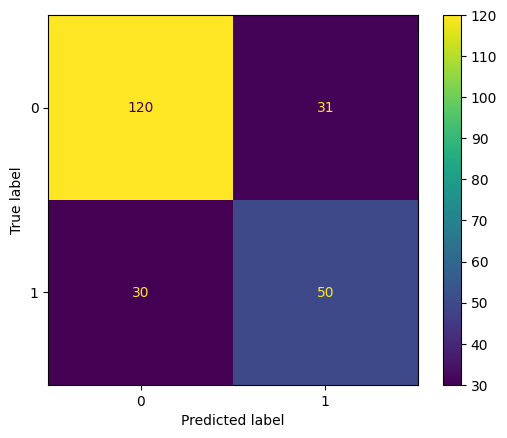

In [ ]:
# model metrics
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
# classification report
report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       150
           1       0.62      0.62      0.62        81

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

